In [309]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import regex as re

In [310]:
# read csv file into a dataframe
df_richest = pd.read_csv('TopRichestInWorld.csv')


In [311]:
# list top 5 rows
df_richest.head()

,Name,NetWorth,Age,Country/Territory,Source,Industry
0,Elon Musk,"$219,000,000,000",50,United States,"Tesla, SpaceX",Automotive
1,Jeff Bezos,"$171,000,000,000",58,United States,Amazon,Technology
2,Bernard Arnault & family,"$158,000,000,000",73,France,LVMH,Fashion & Retail
3,Bill Gates,"$129,000,000,000",66,United States,Microsoft,Technology
4,Warren Buffett,"$118,000,000,000",91,United States,Berkshire Hathaway,Finance & Investments


In [312]:
# list rows, then columns
df_richest.shape


(101, 6)

In [313]:
# list the column names
df_richest.columns

Index(['Name', 'NetWorth', 'Age', 'Country/Territory', 'Source', 'Industry'], dtype='object')

In [314]:
# list the column datatypes
df_richest.dtypes

Name                 object
NetWorth             object
Age                   int64
Country/Territory    object
Source               object
Industry             object
dtype: object

In [315]:
# get metadata in one command
df_richest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               101 non-null    object
 1   NetWorth           101 non-null    object
 2   Age                101 non-null    int64 
 3   Country/Territory  101 non-null    object
 4   Source             101 non-null    object
 5   Industry           101 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.9+ KB


In [316]:
# which industry had the most billionaires
industry = df_richest['Industry'].value_counts()
industry

Fashion & Retail         18
Technology               15
Finance & Investments    13
Metals & Mining           9
Food & Beverage           8
Automotive                7
Diversified               6
Manufacturing             5
Healthcare                5
Media & Entertainment     4
Real Estate               3
Telecom                   2
Logistics                 2
Energy                    2
Gambling & Casinos        1
Service                   1
Name: Industry, dtype: int64

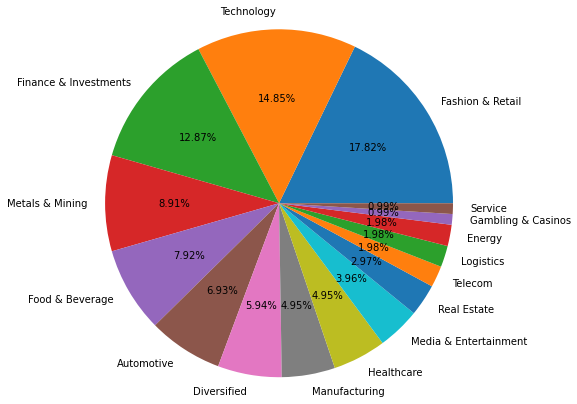

In [317]:
# Create a pie plot of the industries that had the most billionares
industry.plot(kind='pie', autopct='%.2f%%',title=None, radius=2, label = '')
plt.show()

In [318]:
# which country had the most billionares
country = df_richest['Country/Territory'].value_counts()
country

United States    37
China            18
India             7
Germany           7
France            7
Hong Kong         4
Japan             3
Australia         2
Russia            2
Indonesia         2
Italy             2
Canada            2
Mexico            2
Austria           1
Spain             1
Switzerland       1
Chile             1
Singapore         1
Sweden            1
Name: Country/Territory, dtype: int64

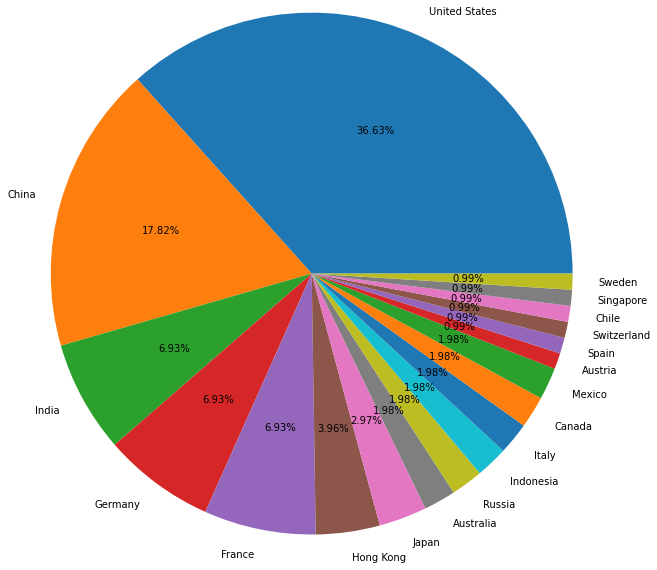

In [319]:
# pie plot of countries with billionaires
country.plot(kind='pie',autopct='%.2f%%',radius=3, label='')
plt.show()

In [320]:
# find which source developed the greatest number of billionaires
df_richest['Source'].value_counts()

mining            4
hedge funds       4
Walmart           3
real estate       3
Google            3
                 ..
Red Bull          1
eyeglasses        1
fashion retail    1
online games      1
chemicals         1
Name: Source, Length: 77, dtype: int64

In [321]:
df_richest['Age'].describe()

count    101.000000
mean      67.118812
std       13.892651
min       30.000000
25%       57.000000
50%       67.000000
75%       77.000000
max       94.000000
Name: Age, dtype: float64

In [322]:
# create a dataframe to add a row into the data base
# received warning that frame.append method is deprecated and should use concat
df_new_guy = pd.DataFrame([['babarehner', '$100,000', 47, 'United States', 'Google', 'Technology']], 
                          columns=['Name', 'NetWorth', 'Age', 'Country/Territory','Source', 'Industry'])
df_new_guy

,Name,NetWorth,Age,Country/Territory,Source,Industry
0,babarehner,"$100,000",47,United States,Google,Technology


In [323]:
# add new_guy dataframe to richest dataframe
df_richest = pd.concat([df_richest, df_new_guy], ignore_index=True)
df_richest.tail()

,Name,NetWorth,Age,Country/Territory,Source,Industry
97,Harold Hamm & family,"$17,200,000,000",76,United States,oil & gas,Energy
98,Sun Piaoyang,"$17,100,000,000",63,China,pharmaceuticals,Healthcare
99,Luo Liguo & family,"$17,000,000,000",66,China,chemicals,Manufacturing
100,Peter Woo,"$17,000,000,000",75,Hong Kong,real estate,Real Estate
101,babarehner,"$100,000",47,United States,Google,Technology


In [324]:
# Remove the '$' sign in 'NetWorth' column
df_richest['NetWorth'] = df_richest['NetWorth'].replace('\$','', regex=True)
# Remove the ',' in the billions column
df_richest['NetWorth'] = df_richest['NetWorth'].replace(',','', regex=True)
# Change the 'NetWorth' column to float and remove all the divide by 1 billion
df_richest['NetWorth'] = (df_richest['NetWorth'].astype(float))/1e9
# Change the column name fro 'NetWorth' to 'Billions' in the printout
df_richest = df_richest.rename(columns={"NetWorth": "Billions"})

In [325]:
# Since 'NetWorth' aka 'Billions' is now a float we can do calculations on it
df_richest['Billions'].describe()

count    102.000000
mean      41.948040
std       35.918514
min        0.000100
25%       20.725000
50%       27.350000
75%       48.725000
max      219.000000
Name: Billions, dtype: float64

In [326]:
# find which 'Source' created the most billions
grp_series = df_richest.groupby(['Source'])['Billions'].sum().sort_values(ascending=False)
grp_series

Source
Google             240.1001
Microsoft          220.4000
Tesla, SpaceX      219.0000
Amazon             214.6000
Walmart            196.5000
                     ...   
medical devices     17.6000
metals              17.3000
oil & gas           17.2000
pharmaceuticals     17.1000
chemicals           17.0000
Name: Billions, Length: 77, dtype: float64

In [327]:
# Show all the 'Google' source members
grp = df_richest.groupby('Source')
df_google = grp.get_group('Google')
df_google

,Name,Billions,Age,Country/Territory,Source,Industry
5,Larry Page,111.0000,49,United States,Google,Technology
6,Sergey Brin,107.0000,48,United States,Google,Technology
69,Eric Schmidt,22.1000,66,United States,Google,Technology
101,babarehner,0.0001,47,United States,Google,Technology


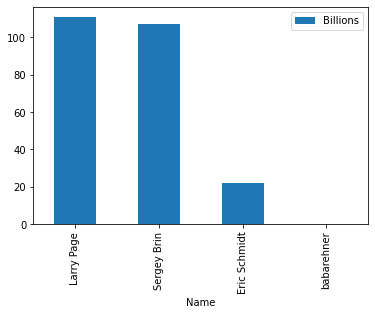

In [328]:
# plot bar graph of how much each google billionaire is worth
df_google.plot( y='Billions', x='Name', kind='bar')
plt.show()

In [329]:
# another way to get groups using lambda function
grp = df_richest.groupby('Source').apply(lambda x: x['Billions'].sum()).sort_values(ascending = False)
# grp.sort_values(ascending = False)
grp

Source
Google             240.1001
Microsoft          220.4000
Tesla, SpaceX      219.0000
Amazon             214.6000
Walmart            196.5000
                     ...   
medical devices     17.6000
metals              17.3000
oil & gas           17.2000
pharmaceuticals     17.1000
chemicals           17.0000
Length: 77, dtype: float64